In [23]:
import game
import agent
import players

import numpy as np
import pickle

In [32]:
# Create a game
g = game.Game(verbose=False)
wins = {1:0, 2:0}
wins1 = []
wins2 = []

# Create two players
p1 = agent.RLAgent("Agent1", g, 0.999999, 0.1, explore_decay=0.999999, train=True) 
p2 = agent.RLAgent("Agent2", g, 0.4, 0.2, train=True)

# Assign the players to the game
g.setPlayers(p1, p2)

for i in range(10_000_000):

    while True:
        board, winner = g.next_turn()
        if board:
            break

    # Update the policy
    p1.update_policy(int(winner == 1))
    p2.update_policy(int(winner == 2))

    # Update the wins
    wins[winner] += 1
    wins1.append(wins[1])
    wins2.append(wins[2])


    # Reset the game
    g.reset()
    g.setPlayers(p2, p1)

    # Print the progress
    if (i+1)%100_000==0:
        print(f'Iteration {i+1} completed')


# Save the policy
with open('policy1.pkl', 'wb') as f:
    pickle.dump(p1.policy, f)

with open('policy2.pkl', 'wb') as f:
    pickle.dump(p2.policy, f)

Iteration 100000 completed
Iteration 200000 completed
Iteration 300000 completed
Iteration 400000 completed
Iteration 500000 completed
Iteration 600000 completed
Iteration 700000 completed
Iteration 800000 completed
Iteration 900000 completed
Iteration 1000000 completed
Iteration 1100000 completed
Iteration 1200000 completed
Iteration 1300000 completed
Iteration 1400000 completed
Iteration 1500000 completed
Iteration 1600000 completed
Iteration 1700000 completed
Iteration 1800000 completed
Iteration 1900000 completed
Iteration 2000000 completed
Iteration 2100000 completed
Iteration 2200000 completed
Iteration 2300000 completed
Iteration 2400000 completed
Iteration 2500000 completed
Iteration 2600000 completed
Iteration 2700000 completed
Iteration 2800000 completed
Iteration 2900000 completed
Iteration 3000000 completed
Iteration 3100000 completed
Iteration 3200000 completed
Iteration 3300000 completed
Iteration 3400000 completed
Iteration 3500000 completed
Iteration 3600000 completed
I

In [49]:
p1.policy

{'004': 0.013322637925825612,
 '017': 0.09492658692665921,
 '357': 0.0,
 '111': 0.8999999999999995,
 '151': 2e-323,
 '351': 0.12713196921315686,
 '201': 0.5703381165772693,
 '257': 0.4763727556854954,
 '110': 0.0,
 '250': 0.23140082792217828,
 '356': 0.26030835473887,
 '204': 0.3140422076824994,
 '354': 0.10392754255097719,
 '003': 0.5870564627030926,
 '014': 0.16404947281958687,
 '027': 0.2666222360421387,
 '240': 0.14773528326288174,
 '350': 0.20988912856648362,
 '230': 0.07187324204763182,
 '050': 0.12593552849073225,
 '155': 0.10653398940088141,
 '210': 0.6107818775686239,
 '113': 2e-323,
 '223': 0.12806468960055958,
 '220': 0.05681259629986513,
 '200': 2e-323,
 '150': 0.1894637392597983,
 '040': 0.07850514875256762,
 '105': 0.04298883134511045,
 '207': 0.11525600568838654,
 '317': 0.11686709996756314,
 '020': 2e-323,
 '005': 0.003995013957869762,
 '355': 0.09075308986744923,
 '021': 0.722721326782395,
 '241': 0.04991743849965457,
 '330': 0.18404706345260627,
 '140': 0.160760817807

In [34]:
#join all keys if unique
len(set(list(p1.policy.keys()) + list(p2.policy.keys())))

188

In [35]:
wins

{1: 1734894, 2: 8265106}

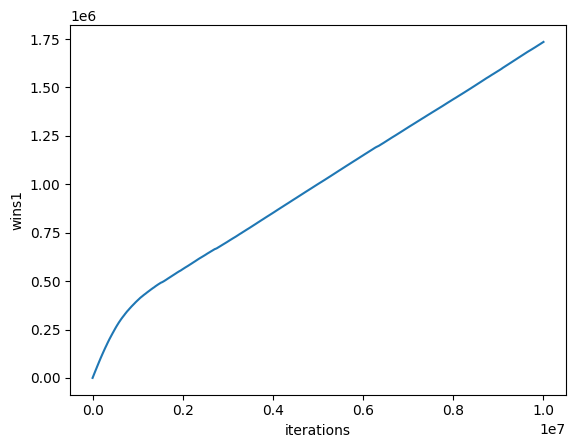

In [37]:
import matplotlib.pyplot as plt

#plot wins1 over time
plt.plot(wins1)
plt.ylabel('wins1')
plt.xlabel('iterations')
plt.show()

In [50]:
testgame = game.Game()

# Create two players
rlagent = agent.RLAgent("Agent1", testgame, 0.999999, 0.1, explore_decay=0.999999, policy=p2.policy, train=False)
me = players.HumanPlayer("Sid", testgame)

# Assign the players to the game
testgame.setPlayers(me,rlagent)

# Play the game
while True:
    board, _ = testgame.next_turn()
    if board==True:
        break

Game state:  [3 5 7]
Player Sid removes 2 lines from row 1
Game state:  [3 3 7]
Player Agent1 removes 1 lines from row 0
Game state:  [2 3 7]
Player Sid removes 7 lines from row 2
Game state:  [2 3 0]
Player Agent1 removes 1 lines from row 0
Game state:  [1 3 0]


ValueError: invalid literal for int() with base 10: ''

In [48]:
p2.policy["221"]

0.46848212763879293